<a href="https://colab.research.google.com/github/SayanDuttaPersonalGithub/DL/blob/main/breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 630.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 71.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires 

In [2]:
from fastbook import search_images_ddg

In [3]:
result=search_images_ddg('Indian Pariah Dog',max_images=150)
len(result)

150

In [4]:
dist='/images/Indian_Pariah_Dog'
download_url(result[0],dist)

Path('/images/Indian_Pariah_Dog')

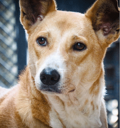

In [5]:
img=Image.open(dist)
img.to_thumb(128,128)

In [6]:
dog_types=["Labrador Retriever",
    "German Shepherd",
    "Golden Retriever",
    "Beagle",
    "Pug",
    "Indian Pariah",
    "Indian Spitz",
    "Boxer",
    "Dachshund",
    "Great Dane"]
path=Path('dog')

In [7]:
print(path)

dog


In [8]:
if not path.exists():
  path.mkdir()
for elm in dog_types:
  dest=path/elm
  dest.mkdir(exist_ok=True)
  result=search_images_ddg(f'{elm} Dog',max_images=50)
  download_images(dest,urls=result)

In [9]:
fns=get_image_files(path)
fns

(#476) [Path('dog/German Shepherd/997037de-b943-42ec-a1c9-42c630760f3e.jpg'),Path('dog/German Shepherd/c3dc3fa9-e82d-4127-8014-2651ae483457.jpg'),Path('dog/German Shepherd/d14300c0-33e3-4f9c-a993-7dee1b6cf29c.jpg'),Path('dog/German Shepherd/363a74b8-d06a-4271-b4ce-6c180a38356e.jpg'),Path('dog/German Shepherd/51b4222d-cf1d-4e53-8a92-9f75860fa608.jpeg'),Path('dog/German Shepherd/8b76258b-557a-4f80-85a7-631709c214f0.jpg'),Path('dog/German Shepherd/11fffe26-b43c-4a66-8349-0ab2f53c5de4.jpg'),Path('dog/German Shepherd/0c9b8ae4-b61f-46df-991a-7f56b99c512d.png'),Path('dog/German Shepherd/8629a901-05af-4871-90d5-f3fe595e3e0f.jpg'),Path('dog/German Shepherd/c11f98cb-ebf0-4f05-9945-b3d3d3692c89.jpg')...]

In [ ]:
failed=verify_images(fns)

In [ ]:
failed.map(Path.unlink)

In [ ]:
dogs = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
dls=dogs.dataloaders(path)

In [ ]:
dls.valid.show_batch(max_n=8,nrows=2)

In [ ]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
dogs=dogs.new(item_tfms=RandomResizedCrop(128,min_scale=0.3))
dls=dogs.dataloaders(path)
dls.train.show_batch(max_n=2,nrows=1,unique=True)

In [ ]:
dogs=dogs.new(item_tfms=RandomResizedCrop(224,min_scale=0.3),
              batch_tfms=aug_transforms())
dls=dogs.dataloaders(path)

In [ ]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(2)

In [ ]:
intrep=ClassificationInterpretation.from_learner(learn)

In [ ]:
intrep.plot_confusion_matrix()

In [ ]:
intrep.plot_top_losses(3,nrows=3)

In [ ]:
cleaner=ImageClassifierCleaner(learn)

In [ ]:
cleaner

In [ ]:
for idx in cleaner.delete() :cleaner.fns[idx].unlink()

In [ ]:
learn.export()

In [ ]:
path=Path()
print(path)
path.ls(file_exts='.pkl')

In [ ]:
learn_inf=load_learner(path/'export.pkl')

In [ ]:
btn_upload=widgets.FileUpload()
btn_upload

In [ ]:
img=PILImage.create(btn_upload.data[-1])

In [ ]:
img.to_thumb(128,128)

In [ ]:
output_plt=widgets.Output();
output_plt.clear_output();
with output_plt :display(img.to_thumb(128,128))
output_plt

In [ ]:
pred,pred_idx,prob=learn_inf.predict(img)

In [ ]:
lbl_pred=widgets.Label()
lbl_pred.value=f'prediction {pred} probability: {prob[pred_idx]:.4f}';
lbl_pred

In [ ]:
btn_run=widgets.Button(description='classify')
btn_run

In [ ]:
def btn_on_click(change):
  img=PILImage.create(btn_upload.data[-1])
  output_plt.clear_output();
  with output_plt :display(img.to_thumb(128,128))
  pred,pred_idx,prob=learn_inf.predict(img);
  lbl_pred.value=f'prediction {pred} probability: {prob[pred_idx]:.4f}';
btn_run.on_click(btn_on_click)

In [ ]:
btn_upload=widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select only Dog, not a picture of you'),btn_upload,btn_run,output_plt,lbl_pred])

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

In [ ]:

!voila content/Copy_of_know_nothing.ipynb